In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

csv_folder = "../csv/"
csv_name = "viagem"

dataframe = pd.read_csv(csv_folder+csv_name+".csv")



## Mostrando o Dataset

In [5]:
print(dataframe.columns.to_list())

column_x = "tempo"
column_y = "distancia"

['tempo', 'distancia']


In [6]:
print(dataframe)

   tempo  distancia
0      0         20
1      8         12
2     20          6
3     25          4


## Separando os valores do dataset em lista para colocar no sistema

In [7]:
# lista de elementos X
list_x = dataframe[column_x].to_list()
# lista de elementos Y
list_y = dataframe[column_y].to_list()

## Visualizando um gráfico de regressão linear das duas variaveis

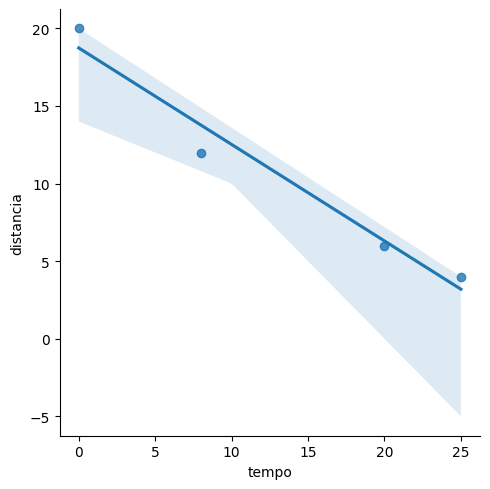

In [8]:
sns.color_palette("bright")

sns.lmplot(data=dataframe,x=column_x, y=column_y)

## Criação e Resolução do sistema

In [9]:
# matriz do sistema
matrix_a = []
# matriz do Y, resultados
matrix_b = list_y

# montando a matriz com arrays
for i in range(len(dataframe)):
    # linha do vetor
    row = []
    for j in range(len(dataframe)):
        row.append(list_x[i] ** j)
    row = np.array(row)
    matrix_a.append(row)
# criando uma matriz com os arrays
matrix_a = np.mat(matrix_a)
print(matrix_a)
# Solução do sistema
system_solution = np.linalg.inv(matrix_a).dot(matrix_b)

print(f"\nMatriz de Solução do sistema:\n{system_solution.tolist()}")


[[    1     0     0     0]
 [    1     8    64   512]
 [    1    20   400  8000]
 [    1    25   625 15625]]

Matriz de Solução do sistema:
[[20.0, -1.3223529411764692, 0.04641176470588232, -0.0007647058823529399]]


In [12]:
choosed_number = 12

solution_list = system_solution.tolist()[0]
predicted_y_list = []

list_x_copy = range(max(list_x)* 3)
# list_x_copy = range(len(list_x))

for x in list_x_copy:
    y = 0
    for a in range(len(solution_list)):
        y += solution_list[a] * (x ** a)
    if x == choosed_number:
        print(f"O valor de Y para {x} é = {y}")
    predicted_y_list.append(y)

print(predicted_y_list)
print(list(list_y))

O valor de Y para 12 é = 9.493647058823543
[20.0, 18.72329411764706, 17.53482352941177, 16.430000000000007, 15.404235294117651, 14.452941176470596, 13.571529411764711, 12.75541176470589, 12.00000000000001, 11.300705882352952, 10.6529411764706, 10.052117647058838, 9.493647058823543, 8.972941176470602, 8.485411764705898, 8.026470588235311, 7.591529411764725, 7.17600000000002, 6.775294117647081, 6.384823529411791, 6.0000000000000275, 5.616235294117671, 5.228941176470615, 4.833529411764733, 4.425411764705913, 4.00000000000003, 3.5527058823529742, 3.078941176470625, 2.574117647058859, 2.0336470588235755, 1.452941176470631, 0.827411764705932, 0.15247058823534587, -0.5764705882352388, -1.363999999999944, -2.214705882352874, -3.133176470588168, -4.123999999999924, -5.191764705882271, -6.3410588235293375, -7.576470588235203, -8.90258823529404, -10.323999999999913, -11.845294117646958, -13.471058823529312, -15.205882352941074, -17.05435294117637, -19.021058823529287, -21.110588235293996, -23.327

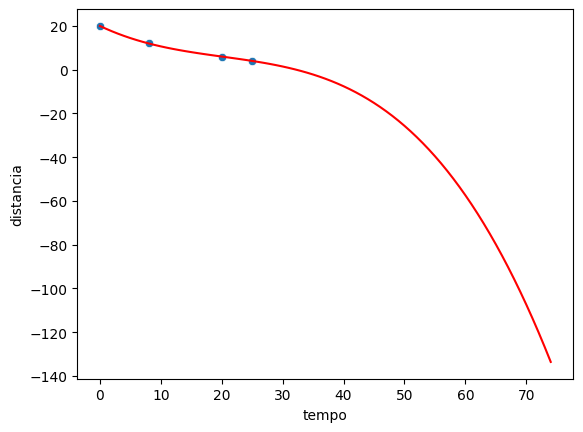

In [11]:
grafico = sns.scatterplot(dataframe, x=dataframe.columns[0], y=dataframe.columns[1])
grafico = sns.lineplot(x=list_x_copy, y=predicted_y_list, color="red")